In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision.transforms import ToTensor
import torch.optim as optim
import os

# aihwkit
from aihwkit.nn.conversion import convert_to_analog

# customized files
from network import InfModel

In [4]:
from PyTorch_CIFAR10.cifar10_models.resnet import resnet18

In [7]:
# Pretrained model
model = resnet18(pretrained=True)
model.eval() # for evaluation

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
# test dataset
transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616))
])

# trainset = dsets.CIFAR10(root='dataset/', train=True,
#                          download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)

testset = dsets.CIFAR10(root='dataset/',
                        train=False,
                        download=True,
                        transform=transform)
batch_size=200
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)  # , num_workers=2

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [18]:
type(testloader)

torch.utils.data.dataloader.DataLoader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


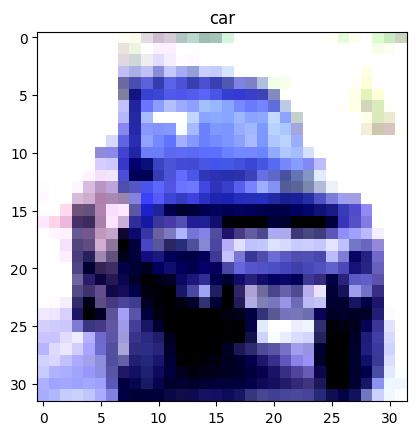

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a single image
image, label = testset[9]

# Convert the tensor to a numpy array and unnormalize
image = image / 2 + 0.5
np_image = image.numpy()

# Display the image
plt.imshow(np.transpose(np_image, (1, 2, 0)))
plt.title(classes[label])
plt.show()

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
correct = 0
total = 0

with torch.no_grad():
    model.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.3f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 93.070 %


In [ ]:
with torch.no_grad():
    test_loss = 0
    total = 0
    correct = 0
    for inputs, targets in testloader:
        inputs = inputs.view(-1, 28*28)  # change size to (batch_size, 784)
        outputs = model_name(inputs)
        test_loss += nn.CrossEntropyLoss()(outputs, targets)

        predict = torch.max(outputs.data, 1)[1]
        total += targets.size(0)
        correct += (predict==targets).sum().item()
    
    test_loss /= len(test_loader)
    test_accuracy = 100* (correct / total)
        
    return test_loss.item(), test_accuracy

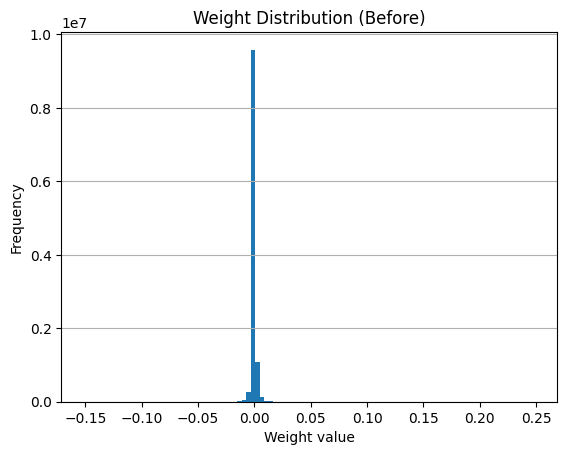

In [9]:
import matplotlib.pyplot as plt

all_weights = []
for name, param in model.named_parameters():
    if 'weight' in name:
        all_weights.extend(param.detach().numpy().flatten())
        
plt.hist(all_weights, bins=100, alpha=1)
plt.title('Weight Distribution (Before)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
# plt.yscale('log')
plt.show()

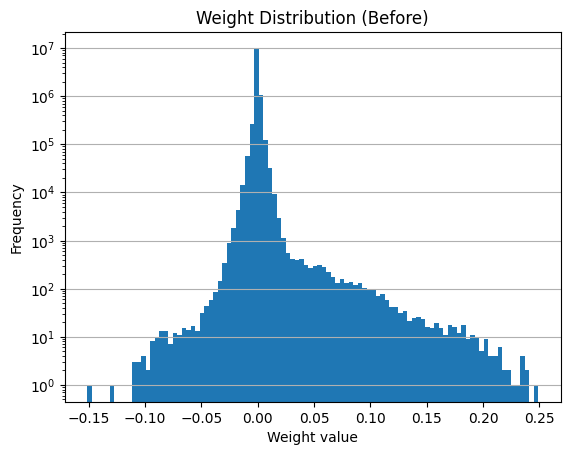

In [10]:
all_weights = []
for name, param in model.named_parameters():
    if 'weight' in name:
        all_weights.extend(param.detach().numpy().flatten())
        
plt.hist(all_weights, bins=100, alpha=1)
plt.title('Weight Distribution (Before)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.yscale('log')
plt.show()


/tmp/ipykernel_6756/2785344593.py:7: RuntimeWarning: divide by zero encountered in log
  y_default = (-0.0155 * np.log(x) + 0.0244).clamp(min=0.049, max=0.1)


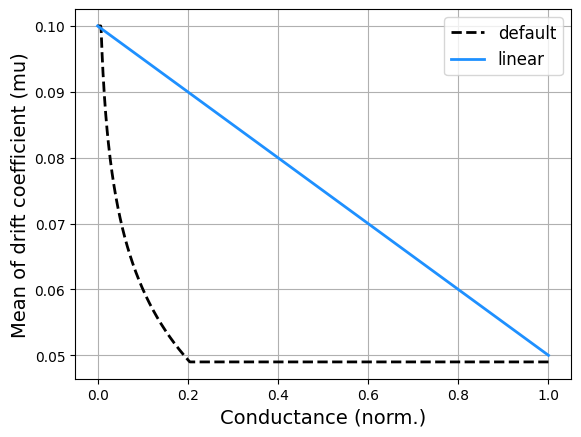

In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x = torch.linspace(0, 1, 1000)

y_default = (-0.0155 * np.log(x) + 0.0244).clamp(min=0.049, max=0.1)
y_linear =  (-0.05 * x + 0.1)

plt.plot(x,y_default, label='default', linewidth=2, linestyle='--', color='k')
plt.plot(x,y_linear, label = 'linear', linewidth=2, color='dodgerblue')

plt.legend(fontsize=12)
plt.xlabel('Conductance (norm.)', fontsize=14)
plt.ylabel('Mean of drift coefficient (mu)', fontsize=14)
plt.grid(True)
plt.show()

### peri customize

In [8]:

# aihwkit related methods
from aihwkit.simulator.configs import (
    InferenceRPUConfig,
    WeightNoiseType,
    WeightClipType,
    WeightModifierType,
)
# from aihwkit.inference import PCMLikeNoiseModel, GlobalDriftCompensation
from aihwkit.nn.conversion import convert_to_analog
from aihwkit.simulator.presets.devices import PCMPresetDevice

In [2]:
rpu_config = InferenceRPUConfig()

print(rpu_config)

InferenceRPUConfig(
    runtime=RuntimeParameter(),
    pre_post=PrePostProcessingParameter(input_range=InputRangeParameter(enable=False)),
    mapping=MappingParameter(),
    forward=IOParameters(),
    backward=IOParameters(is_perfect=True),
    update=UpdateParameters(pulse_type=PulseType.NONE),
    noise_model=PCMLikeNoiseModel(g_converter=SinglePairConductanceConverter(g_max=25.00, g_min=0.00), g_max=25.0, prog_coeff_g_max_reference=25.0, prog_coeff=[0.26348, 1.965, -1.1731], t_0=20.0, t_read=2.5e-07, prog_noise_scale=1.0, read_noise_scale=1.0, drift_scale=1.0),
    drift_compensation=GlobalDriftCompensation(),
    clip=WeightClipParameter(type=WeightClipType.NONE),
    remap=WeightRemapParameter(type=WeightRemapType.NONE),
    modifier=WeightModifierParameter(type=WeightModifierType.NONE),
    device=IdealDevice()
)


In [3]:
# from aihwkit_test.io_test import IOParameters

rpu_config.forward.is_perfect=True

In [4]:
print(rpu_config)

InferenceRPUConfig(
    runtime=RuntimeParameter(),
    pre_post=PrePostProcessingParameter(input_range=InputRangeParameter(enable=False)),
    mapping=MappingParameter(),
    forward=IOParameters(is_perfect=True),
    backward=IOParameters(is_perfect=True),
    update=UpdateParameters(pulse_type=PulseType.NONE),
    noise_model=PCMLikeNoiseModel(g_converter=SinglePairConductanceConverter(g_max=25.00, g_min=0.00), g_max=25.0, prog_coeff_g_max_reference=25.0, prog_coeff=[0.26348, 1.965, -1.1731], t_0=20.0, t_read=2.5e-07, prog_noise_scale=1.0, read_noise_scale=1.0, drift_scale=1.0),
    drift_compensation=GlobalDriftCompensation(),
    clip=WeightClipParameter(type=WeightClipType.NONE),
    remap=WeightRemapParameter(type=WeightRemapType.NONE),
    modifier=WeightModifierParameter(type=WeightModifierType.NONE),
    device=IdealDevice()
)


In [5]:
1 / (2**7 - 2)

0.007936507936507936

In [14]:
2**7

128

In [16]:
rpu_config.drift_compensation = None

In [17]:
print(rpu_config)

InferenceRPUConfig(
    runtime=RuntimeParameter(),
    pre_post=PrePostProcessingParameter(input_range=InputRangeParameter(enable=False)),
    mapping=MappingParameter(),
    forward=IOParameters(is_perfect=True),
    backward=IOParameters(is_perfect=True),
    update=UpdateParameters(pulse_type=PulseType.NONE),
    noise_model=PCMLikeNoiseModel(g_converter=SinglePairConductanceConverter(g_max=25.00, g_min=0.00), g_max=25.0, prog_coeff_g_max_reference=25.0, prog_coeff=[0.26348, 1.965, -1.1731], t_0=20.0, t_read=2.5e-07, prog_noise_scale=1.0, read_noise_scale=1.0, drift_scale=1.0),
    drift_compensation=None,
    clip=WeightClipParameter(type=WeightClipType.NONE),
    remap=WeightRemapParameter(type=WeightRemapType.NONE),
    modifier=WeightModifierParameter(type=WeightModifierType.NONE),
    device=IdealDevice()
)
